<a href="https://colab.research.google.com/github/EmidioLP/Freecodecamp/blob/main/Notebooks/Machine%20Learning%20with%20Python/Visao_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook é baseado nas aulas disponibilizadas em: https://www.freecodecamp.org/portuguese/learn/machine-learning-with-python/

# Visão computacional

Esse módulo irá ensinar classificação de imagens e detecção/reconhecimento de objetos utilizando visão computacional com algo chamado **convolutional neural network**.

Esse algoritmo detém as seguintes características:


*   Image Data
*   Convolutional Layer
*   Pooling Layer
*   CNN Architectures



# Image Data

Agora, iremos lidar com dados em imagem que geralmente é criado com três dimensões. As três dimensões são as seguintes:



*   Image height
*   Image width
*   Color channels

O atributo **Color channel** representa a profundidade da imagem e é coorelacionado as cores utilizadas nela. Por exemplo, uma image com três canais (channels) esta provavelmente utilizando o formato rgb (red, green, blue) de pixels. Cada pixel terá três valores numéricos que representam cada cor. 



# Dataset

Essa aula foi baseada na seguinte guia disponibilizada na documentação do Tensorflow: https://wwwmtensorflow.org/tutorials/images/cnn

O problema que iremos tratar é a classificação de 10 diferentes objetos do dia a dia. A base de dados é padrão da biblioteca Tensorflow e é chamada CIFAR Image Dataset. Nela contém 60,000 32x32 imagens com cor com 6000 imagens para cada classe. 

As labels no dataset são:


*   Airplane
*   Automobile
*   Bird
*   Cat
*   Deer
*   Dog
*   Frog
*   Horse
*   Ship
*   Truck



# Imports e Setup

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#Carregando e dividindo o dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalização dos valores dos pixels para ficarem entre 0 e 1
train_images, test_images = train_images / 255.0, test_images/ 255.0

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step


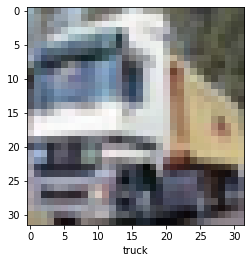

In [6]:
#Verificando uma imagem
IMG_INDEX = 1 #Indexação da imagem no dataset, basta modificar para ver diferentes imagens

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# CNN Architecture

Vamos iniciar a construção de uma rede convulacional.

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

**Camada 1**

A entrada dos nossos dados se da em 32, 32, 3 e nós iremos processar 32 filtros de tamanho 3x3. Também iremos utilizar a função de ativação relu para cada operação convulacional.

**Camada 2**

Essa camada irá realizar a opreção de max pooling utilizando pedaços 2x2 e com uma stride de 2.

**Outras camadas**

As outras camadas farão algo similar as duas superiores mas usando as entradas do feature map anterior.

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

# Adicionando camadas densas

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

#Treinamento


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5513 - accuracy: 0.4332 - val_loss: 1.3569 - val_accuracy: 0.5141
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1876 - accuracy: 0.5771 - val_loss: 1.1710 - val_accuracy: 0.5810
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0382 - accuracy: 0.6339 - val_loss: 1.0283 - val_accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9444 - accuracy: 0.6680 - val_loss: 0.9380 - val_accuracy: 0.6704
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8684 - accuracy: 0.6936 - val_loss: 0.9513 - val_accuracy: 0.6685
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8092 - accuracy: 0.7157 - val_loss: 0.9005 - val_accuracy: 0.6824
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7628 - accuracy: 0.7306 - val_loss: 0.9048 -

# Validação do modelo

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_acc)

313/313 - 4s - loss: 0.8793 - accuracy: 0.7036 - 4s/epoch - 13ms/step
0.7035999894142151


# Acréscimo de dados

Em uma ocasião aonde não se há milhões de imagens, é dificil o treinamento de um modelo CNN do nada que performe muito bem. Por isso precisamos aprender algumas estratégias de treinamento de modelos CNN em bases de dados pequenas. 

Para evitar o overfitting e criar uma base de dados maior de uma menor se é utlizad a técnica chamada **data augmentation**. Ela é simplesmente a realização de transformações randômicas nas imagens para que o modelo possa generalizar de uma forma melhor. Essa transformação pode ser algo como compressão, rotação, esticar e até mudança de cor. 

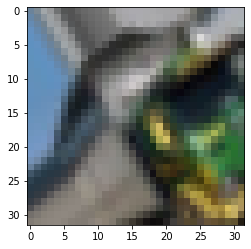

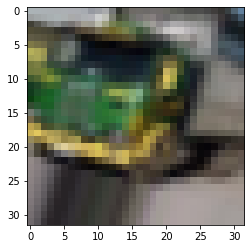

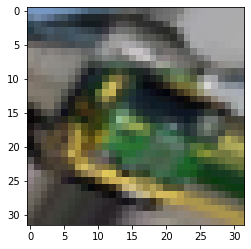

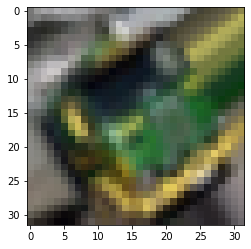

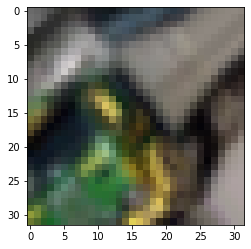

In [15]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#Cria um objeto 'data generator' que transforma imagens
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#Seleciona uma imagem para transformar
test_img = train_images[14]
img = image.img_to_array(test_img) #Converte a imagem para um array numpy
img = img.reshape((1,) + img.shape)

i=0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'): #Esse loop rodar eternamente até darmos um break, salvando imagens
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i +=1
  if i>4: #Mostra quatro imagens
    break

plt.show()